In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-seattle/train.csv
/kaggle/input/house-price-prediction-seattle/test.csv


In [36]:
train=pd.read_csv("/kaggle/input/house-price-prediction-seattle/train.csv")
test=pd.read_csv("/kaggle/input/house-price-prediction-seattle/test.csv")

# Data Understanding

In [37]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [38]:
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [41]:
train.size

16128

In [42]:
test.size

4040

In [43]:
df = pd.concat([train, test], axis=0)

In [44]:
df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [45]:
df.shape

(2521, 8)

In [46]:
df.isna().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          424
lot_size_units    424
zip_code            0
price               0
dtype: int64

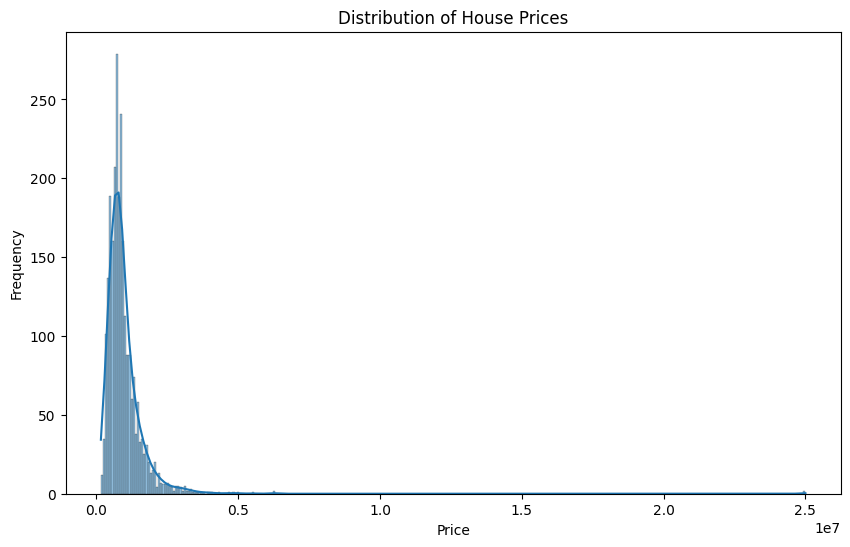

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


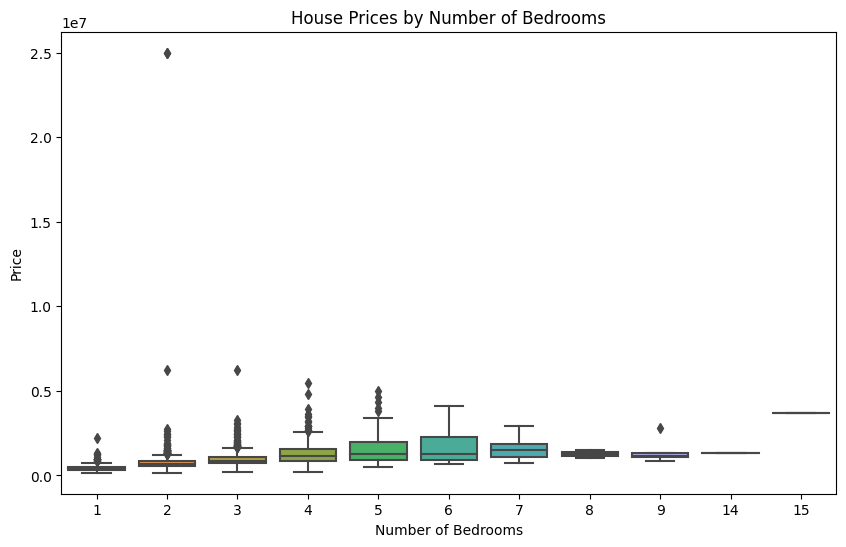

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='beds', y='price', data=df)
plt.title('House Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

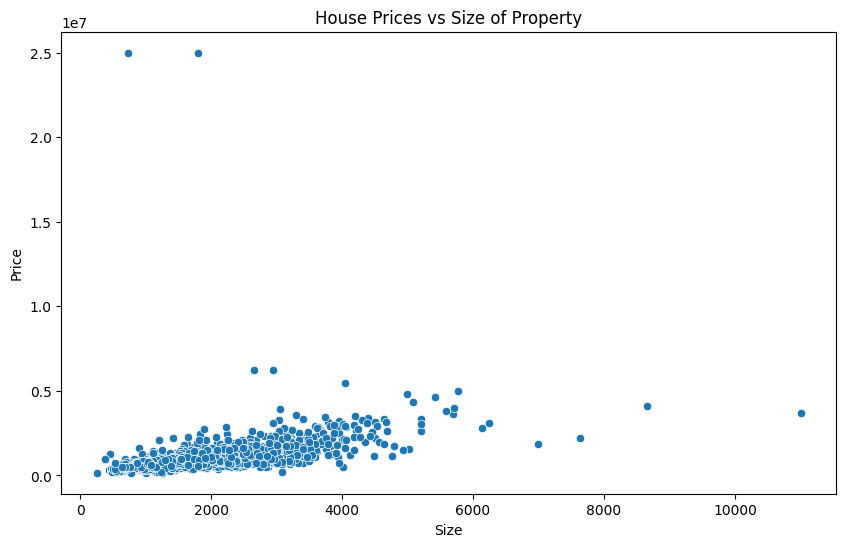

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='price', data=df)
plt.title('House Prices vs Size of Property')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()


# Data Preprocessing

In [50]:
df.dropna(inplace=True)
df.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [51]:
df.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [52]:
df = df.drop(['size_units','lot_size_units', 'zip_code'], axis = 1)

**Assigning x and y**

In [54]:
x= df.drop('price', axis = 1)
y=df['price']

**Train Test Split**

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

# Random Forest

In [60]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'n_estimators': 38}

In [61]:
rf=RandomForestClassifier(n_estimators=38)
rf.fit(x_train,y_train)

ŷ_train=rf.predict(x_train)
ŷ_test=rf.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(rf,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.9910554561717353
test_accuracy 0.014285714285714285
CV 0.02266169154228856


# Ada Boost

In [62]:
from  sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'n_estimators': 7}

In [63]:
ab=AdaBoostClassifier(n_estimators=7)
ab.fit(x_train,y_train)

ŷ_train=ab.predict(x_train)
ŷ_test=ab.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(ab,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.01908169350029815
test_accuracy 0.014285714285714285
CV 0.016698649609097373
